In [1]:
from smartem.segmentation import segmenter, utils
from skimage import measure
from smartem.offline.train_mb_error_detector.NNtools import UNet
import cv2 as cv
import h5py
import matplotlib.pyplot as plt
import torch
import numpy as np

In [15]:
model = UNet.UNet(1,2)
model_path = '/home/tommy-local/projects/smartem/SmartEM/pretrained_models/unet_50_1.29e-01.pth'
Iseg = segmenter.Segmenter(model_path, segmenter_function = measure.label, device=torch.device("cuda:1"))
Iseg.set_model(model_class=model)

images = {}

desired_dwts = [25, 50 100, 400, 800, 1200]

with h5py.File("/storage2/projects/smartEM/em-vis/smartem-data-test.hdf5", "r") as f:
    reg = list(f.keys())[0]
    group = f[reg]


    for dwt in desired_dwts:
        im = group[f"{dwt}/im"][()]
        mask = group[f"{dwt}/mask"][()]

        _, mb_probs = Iseg.get_membranes(im, get_probs=True)
        labels = Iseg.get_labels(im)

        labels = utils.shuffle_labels(labels)
        masked_label = np.ma.masked_where(labels == 0, labels)

        images[f"{dwt}ns_image"] = im
        images[f"{dwt}ns_label"] = masked_label
        images[f"{dwt}ns_pred"] = mb_probs

gt_labels = measure.label(255 - mask)
gt_labels = utils.shuffle_labels(gt_labels)
gt_labels = np.ma.masked_where(gt_labels == 0, gt_labels)

images["ground_truth_image"] = im
images["ground_truth_label"] = gt_labels
images["ground_truth_pred"] = mask
images["high_dwell_time_image"] = im


Inverting the image as not using custom watershed function
Inverting the image as not using custom watershed function
Inverting the image as not using custom watershed function
Inverting the image as not using custom watershed function
Inverting the image as not using custom watershed function


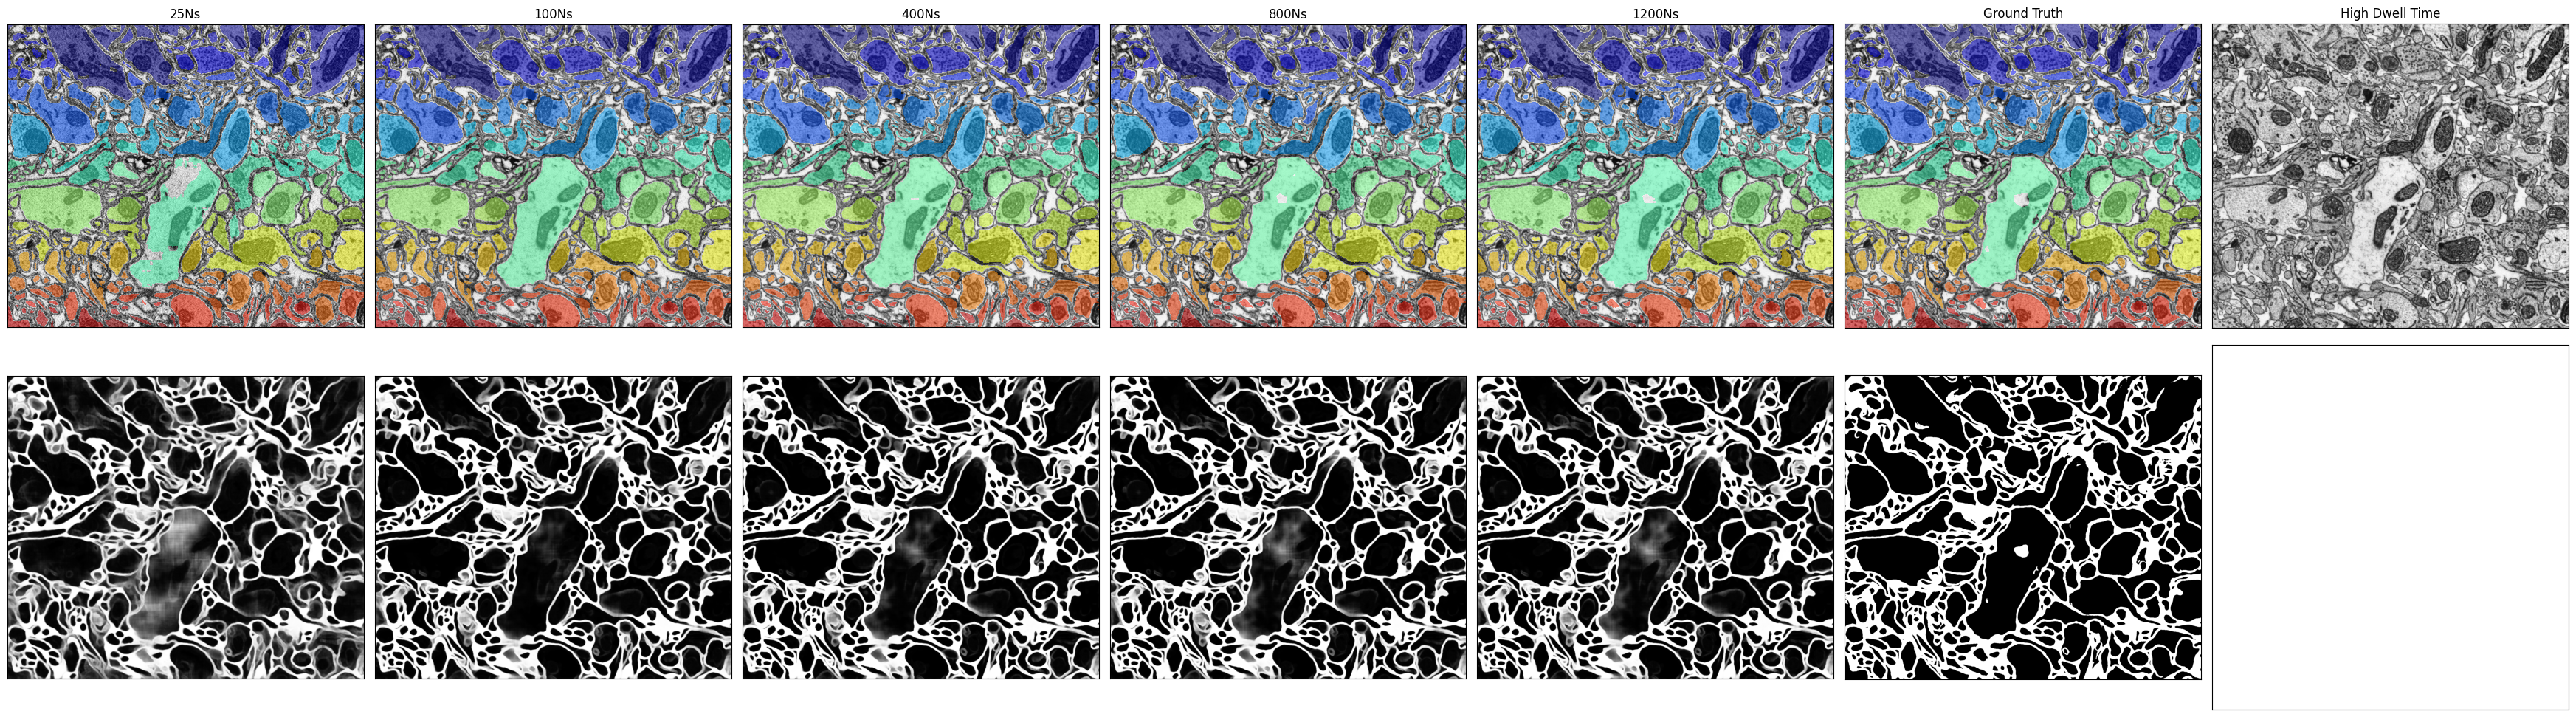

In [16]:
utils.visualize(**images)